In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

#text pre-porcessing
#!pip install nltk
import nltk
#nltk.download()
from nltk.corpus import stopwords 
from textblob import Word


#visualization
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter


#creating plots
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist


#get labels and emotions
from textblob import TextBlob
from transformers import pipeline


In [2]:
df = pd.read_csv('data/news.csv', sep=';', encoding='utf-8-sig')
df= df[['newspaper','date','abstract']]
df

,newspaper,date,abstract
0,Mail Online,31.12.2022,the new year is likely to bring more challenge...
1,Mail Online,29.12.2022,worldwide shipments of virtual and augmented r...
2,Mail Online,29.12.2022,the year ahead brings new guard rails for cryp...
3,Mail Online,29.12.2022,the fortunes of silicon valley billionaires to...
4,Mail Online,29.12.2022,mailonline takes a look at the science behind ...
...,...,...,...
4125,CNBC,11.03.2021,Gaming company Roblox went public Wednesday an...
4126,CNBC,10.03.2021,Neil Rimer recalls having early conversations ...
4127,CNBC,03.03.2021,LONDON Fortnite developer Epic Games has acqu...
4128,CNBC,01.03.2021,In October 2020 Miamibased art collector Pablo...


In [3]:

df['date']=pd.to_datetime(df.date, format='%d.%m.%Y')


In [4]:
#df['title']=df["title"].values.astype('str')
df['abstract']=df["abstract"].values.astype('str')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130 entries, 0 to 4129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   newspaper  4130 non-null   object        
 1   date       4130 non-null   datetime64[ns]
 2   abstract   4130 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 96.9+ KB


Converting Text Data to Lowercase

In [6]:
#df['title']=df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['abstract']=df['abstract'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [7]:
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented r...
2,Mail Online,2022-12-29,the year ahead brings new guard rails for cryp...
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires to...
4,Mail Online,2022-12-29,mailonline takes a look at the science behind ...
...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday an...
4126,CNBC,2021-03-10,neil rimer recalls having early conversations ...
4127,CNBC,2021-03-03,london fortnite developer epic games has acqui...
4128,CNBC,2021-03-01,in october 2020 miamibased art collector pablo...


contraction reformation

In [8]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'll": "he will",
"he's": "he is",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"o'clock": "of the clock",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there's": "there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"will've": "will have",
"won't": "will not",
"would've": "would have",
"wouldn't": "would not",
"y'all": "you all",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [9]:
contractions["ain't"]

'am not'

In [10]:
def replace_negations(words):
    sentence=[]
    for word in words:
        if word in contractions.keys():
            sentence.append(contractions[word])
        else:
            sentence.append(word)
    return " ".join(sentence)


In [11]:
#df['title'] = df.apply(lambda row: replace_negations(row['title'].split()),axis=1)
df['abstract'] = df.apply(lambda row: replace_negations(row['abstract'].split()),axis=1)



In [12]:
df.head(10)

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented r...
2,Mail Online,2022-12-29,the year ahead brings new guard rails for cryp...
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires to...
4,Mail Online,2022-12-29,mailonline takes a look at the science behind ...
5,Mail Online,2022-12-23,2022 has been a turbulent year in the tech sec...
6,Mail Online,2022-12-20,by katie paulsan jose calif. dec 20 reuters me...
7,Mail Online,2022-12-20,meta is still making a push into building the ...
8,Mail Online,2022-12-19,"dec 19 reuters ""call of duty"" maker activision..."
9,Mail Online,2022-12-17,berkeley calif. ap a prominent video game crea...


Removing punctuation

In [13]:
#df['title'] = df['title'].str.replace('[^\w\s]'," ")
df['abstract'] = df['abstract'].str.replace('[^\w\s]'," ")
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented r...
2,Mail Online,2022-12-29,the year ahead brings new guard rails for cryp...
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires to...
4,Mail Online,2022-12-29,mailonline takes a look at the science behind ...
...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday an...
4126,CNBC,2021-03-10,neil rimer recalls having early conversations ...
4127,CNBC,2021-03-03,london fortnite developer epic games has acqui...
4128,CNBC,2021-03-01,in october 2020 miamibased art collector pablo...


Removing numerical values

In [14]:
#df['title'] = df['title'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['abstract'] = df['abstract'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...
1,Mail Online,2022-12-29,worldwide shipments of virtual and augmented r...
2,Mail Online,2022-12-29,the year ahead brings new guard rails for cryp...
3,Mail Online,2022-12-29,the fortunes of silicon valley billionaires to...
4,Mail Online,2022-12-29,mailonline takes a look at the science behind ...
...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday an...
4126,CNBC,2021-03-10,neil rimer recalls having early conversations ...
4127,CNBC,2021-03-03,london fortnite developer epic games has acqui...
4128,CNBC,2021-03-01,in october miamibased art collector pablo rod...


Lemmatizing

In [15]:
#df['title'] = df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['abstract'] = df['abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

,newspaper,date,abstract
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...
1,Mail Online,2022-12-29,worldwide shipment of virtual and augmented re...
2,Mail Online,2022-12-29,the year ahead brings new guard rail for crypt...
3,Mail Online,2022-12-29,the fortune of silicon valley billionaire took...
4,Mail Online,2022-12-29,mailonline take a look at the science behind w...
...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday an...
4126,CNBC,2021-03-10,neil rimer recall having early conversation ab...
4127,CNBC,2021-03-03,london fortnite developer epic game ha acquire...
4128,CNBC,2021-03-01,in october miamibased art collector pablo rodr...


tokenized words

In [16]:
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['abstract']), axis=1)


In [17]:
df

,newspaper,date,abstract,tokenized
0,Mail Online,2022-12-31,the new year is likely to bring more challenge...,"[the, new, year, is, likely, to, bring, more, ..."
1,Mail Online,2022-12-29,worldwide shipment of virtual and augmented re...,"[worldwide, shipment, of, virtual, and, augmen..."
2,Mail Online,2022-12-29,the year ahead brings new guard rail for crypt...,"[the, year, ahead, brings, new, guard, rail, f..."
3,Mail Online,2022-12-29,the fortune of silicon valley billionaire took...,"[the, fortune, of, silicon, valley, billionair..."
4,Mail Online,2022-12-29,mailonline take a look at the science behind w...,"[mailonline, take, a, look, at, the, science, ..."
...,...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday an...,"[gaming, company, roblox, went, public, wednes..."
4126,CNBC,2021-03-10,neil rimer recall having early conversation ab...,"[neil, rimer, recall, having, early, conversat..."
4127,CNBC,2021-03-03,london fortnite developer epic game ha acquire...,"[london, fortnite, developer, epic, game, ha, ..."
4128,CNBC,2021-03-01,in october miamibased art collector pablo rodr...,"[in, october, miamibased, art, collector, pabl..."


In [18]:
#pip install PyEnchant

Process of removing words that are not in the English dictionary

In [19]:
import enchant as pe
d = pe.Dict("en")

In [20]:
def non_english(words):
    non_eng=[]
    for word in words:
        if d.check(word)!=True:
            non_eng.append(word)
    return non_eng


In [21]:
all_tokens=[]


for row in df['tokenized']:
    for word in row:
        all_tokens.append(word)




In [22]:
arr_tokens=np.array(all_tokens)
arr_tokens_uniq=np.unique(arr_tokens)



In [23]:
len(all_tokens)

120742

In [24]:
len(arr_tokens_uniq)

11088

In [25]:
no_eng = non_english(arr_tokens_uniq)

In [26]:
no_eng[40:60]

['afterhours',
 'aftermetaverse',
 'afterthebell',
 'ag',
 'agapitov',
 'agereality',
 'aggarwal',
 'agingup',
 'agrawal',
 'agya',
 'ahn',
 'aibased',
 'aida',
 'aileen',
 'aime',
 'aipowered',
 'airbnb',
 'airtel',
 'akash',
 'akayla']

In [27]:
len(no_eng)

3675

In [28]:
dict_non_eng ={'word':no_eng}

In [29]:
pd.DataFrame(dict_non_eng).to_csv('false_words.csv',index=False )

Chose manually valid words which doesn't appear in dictionary from PyEnchant 

In [30]:
not_to_remove= pd.read_csv('words_to_keep.csv',sep=',')

In [31]:
not_remove_list=not_to_remove.word.tolist()

In [32]:
not_remove_list

['aaron',
 'abramovich',
 'abrams',
 'accenture',
 'accesories',
 'ackman',
 'activision',
 'ada',
 'adam',
 'adidas',
 'adrian',
 'adriana',
 'afghanistan',
 'africa',
 'african',
 'afrocaribbean',
 'afterhours',
 'airbnb',
 'aleksander',
 'aleksandr',
 'alex',
 'alexa',
 'alexander',
 'alexis',
 'allstar',
 'alltime',
 'alphawise',
 'alzheimers',
 'american',
 'analyse',
 'analytics',
 'anderson',
 'andrea',
 'andrew',
 'andy',
 'angeles',
 'anthony',
 'anticompetitive',
 'antitracking',
 'april',
 'argentina',
 'arkansas',
 'armour',
 'armstrong',
 'arnold',
 'arthur',
 'asia',
 'athens',
 'atlanta',
 'atlantic',
 'austin',
 'australia',
 'australian',
 'authorised',
 'autodesk',
 'aws',
 'bahamas',
 'baidu',
 'balenciaga',
 'ballentine',
 'balvin',
 'bangkok',
 'barbados',
 'barbeque',
 'barcelona',
 'behaviour',
 'benchmarked',
 'bernstein',
 'beverly',
 'beyonce',
 'bezos',
 'biden',
 'bieber',
 'binance',
 'bitpay',
 'bitwise',
 'blockchain',
 'blockchains',
 'boeing',
 'boston'

In [33]:
for word in not_remove_list:
    if word in no_eng:
        no_eng.remove(word)


In [34]:
no_eng.append('ha') #append as the word ha appears in many abstracts but has no meaning in the context

In [35]:
no_eng[:10]

['aapl',
 'abboud',
 'abbv',
 'abbvie',
 'abc',
 'abercrombie',
 'abes',
 'abhijit',
 'aboutface',
 'abovitz']

Removing Stop Words

In [36]:
#nltk.download('punkt')


Removing stop words extended by a list of non-English words

In [37]:
stop = stopwords.words('english')
stop.extend(no_eng)
df['abstract'] = df.apply(lambda row: " ".join(word for word in row['tokenized'] if word not in stop),axis=1)

In [38]:
df

,newspaper,date,abstract,tokenized
0,Mail Online,2022-12-31,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, ..."
1,Mail Online,2022-12-29,worldwide shipment virtual augmented reality h...,"[worldwide, shipment, of, virtual, and, augmen..."
2,Mail Online,2022-12-29,year ahead brings new guard rail crypto blockc...,"[the, year, ahead, brings, new, guard, rail, f..."
3,Mail Online,2022-12-29,fortune silicon valley billionaire took beatin...,"[the, fortune, of, silicon, valley, billionair..."
4,Mail Online,2022-12-29,take look science behind sticking virtual real...,"[mailonline, take, a, look, at, the, science, ..."
...,...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday en...,"[gaming, company, roblox, went, public, wednes..."
4126,CNBC,2021-03-10,recall early conversation became roblox studyi...,"[neil, rimer, recall, having, early, conversat..."
4127,CNBC,2021-03-03,london fortnite developer epic game acquired t...,"[london, fortnite, developer, epic, game, ha, ..."
4128,CNBC,2021-03-01,october art collector spent almost second vide...,"[in, october, miamibased, art, collector, pabl..."


Removing single letters in text apart from 'i' (as pronoun)

In [39]:
#df['title'] = df['title'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df['abstract'] = df['abstract'].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1 or w=='i'] ))
df

,newspaper,date,abstract,tokenized
0,Mail Online,2022-12-31,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, ..."
1,Mail Online,2022-12-29,worldwide shipment virtual augmented reality h...,"[worldwide, shipment, of, virtual, and, augmen..."
2,Mail Online,2022-12-29,year ahead brings new guard rail crypto blockc...,"[the, year, ahead, brings, new, guard, rail, f..."
3,Mail Online,2022-12-29,fortune silicon valley billionaire took beatin...,"[the, fortune, of, silicon, valley, billionair..."
4,Mail Online,2022-12-29,take look science behind sticking virtual real...,"[mailonline, take, a, look, at, the, science, ..."
...,...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday en...,"[gaming, company, roblox, went, public, wednes..."
4126,CNBC,2021-03-10,recall early conversation became roblox studyi...,"[neil, rimer, recall, having, early, conversat..."
4127,CNBC,2021-03-03,london fortnite developer epic game acquired t...,"[london, fortnite, developer, epic, game, ha, ..."
4128,CNBC,2021-03-01,october art collector spent almost second vide...,"[in, october, miamibased, art, collector, pabl..."


Adding column month to explore data over time

In [40]:
df['month']= df["date"].dt.month
df

,newspaper,date,abstract,tokenized,month
0,Mail Online,2022-12-31,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, ...",12
1,Mail Online,2022-12-29,worldwide shipment virtual augmented reality h...,"[worldwide, shipment, of, virtual, and, augmen...",12
2,Mail Online,2022-12-29,year ahead brings new guard rail crypto blockc...,"[the, year, ahead, brings, new, guard, rail, f...",12
3,Mail Online,2022-12-29,fortune silicon valley billionaire took beatin...,"[the, fortune, of, silicon, valley, billionair...",12
4,Mail Online,2022-12-29,take look science behind sticking virtual real...,"[mailonline, take, a, look, at, the, science, ...",12
...,...,...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday en...,"[gaming, company, roblox, went, public, wednes...",3
4126,CNBC,2021-03-10,recall early conversation became roblox studyi...,"[neil, rimer, recall, having, early, conversat...",3
4127,CNBC,2021-03-03,london fortnite developer epic game acquired t...,"[london, fortnite, developer, epic, game, ha, ...",3
4128,CNBC,2021-03-01,october art collector spent almost second vide...,"[in, october, miamibased, art, collector, pabl...",3


Saving the cleaned data for other uses

In [41]:
df.to_csv("clean.csv",encoding="utf-8-sig", sep=';',index=False)

Creating a plot - Amount of news per month

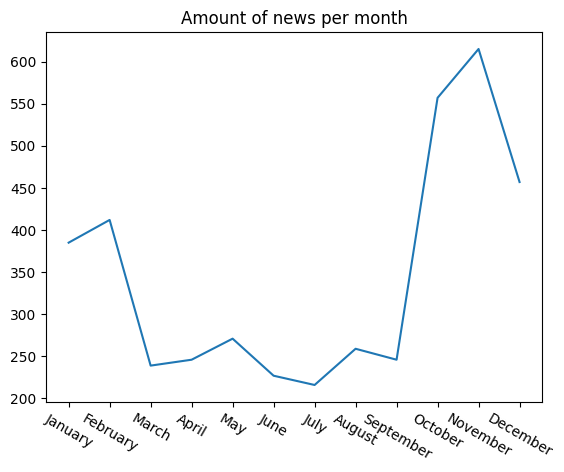

In [42]:
months_names= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_d = df.value_counts('month').sort_index()
plt.plot(months_names,monthly_d)



plt.title('Amount of news per month')
plt.xticks(rotation = -30)

plt.show()

Creating word cloud

In [43]:
# titles_list=df['title'].to_list()
# joined_titles= " ".join(titles_list)
# without_meta_t= list(filter(lambda w: w not in ['metaverse','meta'], joined_titles.split()))



In [44]:
def word_cloud(data):
    wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='white', 
                      min_font_size = 10).generate(data)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [45]:
# df_title = " ".join(without_meta_t)
# word_cloud(df_title)


In [46]:
abstract_list=df['abstract'].to_list()
joined_abstract= " ".join(abstract_list)
without_meta_a= list(filter(lambda w: w not in ['metaverse','meta'], joined_abstract.split()))



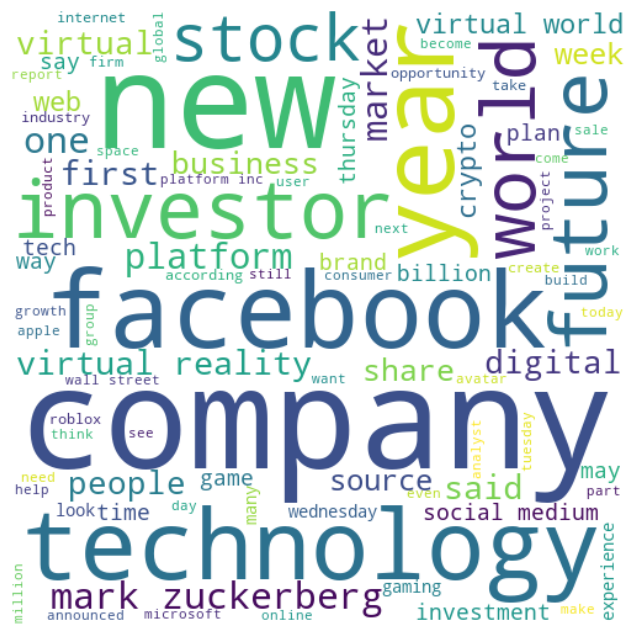

In [47]:
df_abstract =" ".join(without_meta_a)
word_cloud(df_abstract)


Plotting most frequent words from reviews using bar chart

In [48]:
def plot_top_words(data, how_many_words):
    sns.set(style='white')
    words_split= data.split()
    words_freq= FreqDist(words_split)

    words_df= pd.DataFrame({'word':list(words_freq.keys()),'count':list(words_freq.values())})

    top_words= words_df.nlargest(columns='count',n=how_many_words)
    top_words.sort_values('count',inplace=True)

    # Plotting 20 frequent words
    plt.figure(figsize=(20,5))
    ax = plt.barh(top_words['word'], width = top_words['count'])
    plt.show()



In [49]:
# plot_top_words(df_title,20)

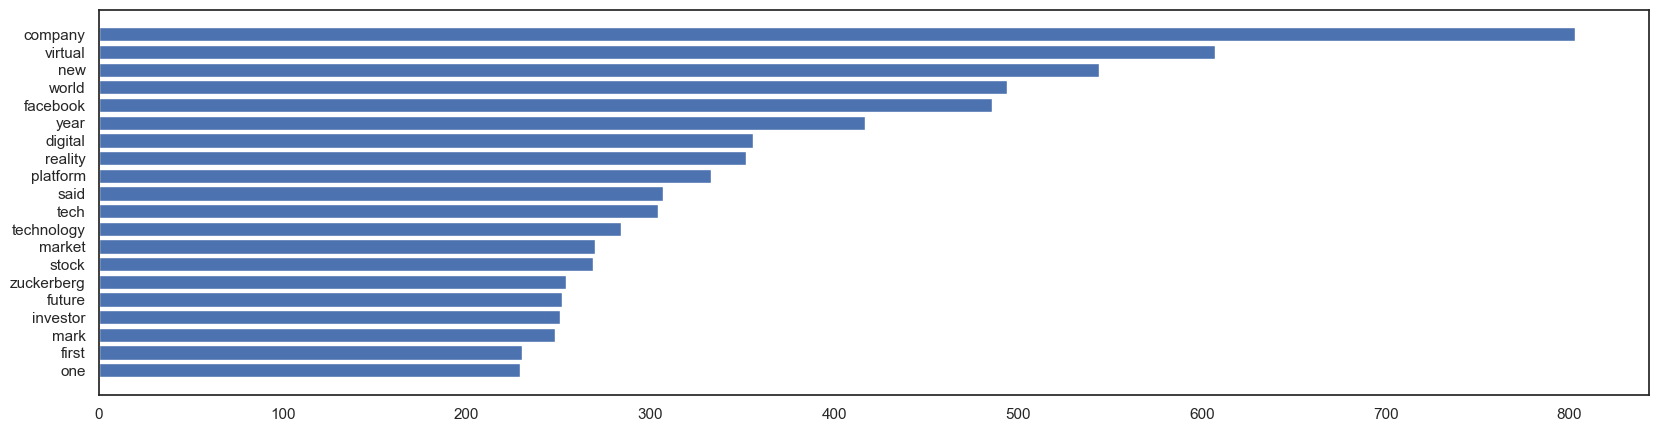

In [50]:
plot_top_words(df_abstract,20)

Sentiment classification using DistilRoBERTa model - emotions

In [51]:
classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)


Some weights of RobertaModel were not initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
def sentiment_emotion(row):
    content= row
    sentiment=classifier(content)
    return sentiment[0]['label']

df['emotion'] = df.apply(lambda row: sentiment_emotion(row['abstract']),axis=1)

In [54]:
df

,newspaper,date,abstract,tokenized,month,emotion
0,Mail Online,2022-12-31,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, ...",12,neutral
1,Mail Online,2022-12-29,worldwide shipment virtual augmented reality h...,"[worldwide, shipment, of, virtual, and, augmen...",12,surprise
2,Mail Online,2022-12-29,year ahead brings new guard rail crypto blockc...,"[the, year, ahead, brings, new, guard, rail, f...",12,neutral
3,Mail Online,2022-12-29,fortune silicon valley billionaire took beatin...,"[the, fortune, of, silicon, valley, billionair...",12,sadness
4,Mail Online,2022-12-29,take look science behind sticking virtual real...,"[mailonline, take, a, look, at, the, science, ...",12,neutral
...,...,...,...,...,...,...
4125,CNBC,2021-03-11,gaming company roblox went public wednesday en...,"[gaming, company, roblox, went, public, wednes...",3,surprise
4126,CNBC,2021-03-10,recall early conversation became roblox studyi...,"[neil, rimer, recall, having, early, conversat...",3,surprise
4127,CNBC,2021-03-03,london fortnite developer epic game acquired t...,"[london, fortnite, developer, epic, game, ha, ...",3,joy
4128,CNBC,2021-03-01,october art collector spent almost second vide...,"[in, october, miamibased, art, collector, pabl...",3,surprise


In [56]:
df.groupby('emotion')['emotion'].count()

emotion
anger        275
disgust       12
fear         375
joy          866
neutral     1644
sadness      341
surprise     617
Name: emotion, dtype: int64

negative positive labelling using TextBlob

In [57]:
# function to calculate subjectivity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [58]:

df['polarity'] = df['abstract'].apply(getPolarity) 
df['label'] = df['polarity'].apply(analysis)
df.head(20)

,newspaper,date,abstract,tokenized,month,emotion,polarity,label
0,Mail Online,2022-12-31,new year likely bring challenge tech sector,"[the, new, year, is, likely, to, bring, more, ...",12,neutral,0.068182,Positive
1,Mail Online,2022-12-29,worldwide shipment virtual augmented reality h...,"[worldwide, shipment, of, virtual, and, augmen...",12,surprise,0.000000,Neutral
2,Mail Online,2022-12-29,year ahead brings new guard rail crypto blockc...,"[the, year, ahead, brings, new, guard, rail, f...",12,neutral,0.068182,Positive
3,Mail Online,2022-12-29,fortune silicon valley billionaire took beatin...,"[the, fortune, of, silicon, valley, billionair...",12,sadness,-0.500000,Negative
4,Mail Online,2022-12-29,take look science behind sticking virtual real...,"[mailonline, take, a, look, at, the, science, ...",12,neutral,-0.400000,Negative
5,Mail Online,2022-12-23,turbulent year tech sector,"[ha, been, a, turbulent, year, in, the, tech, ...",12,fear,0.000000,Neutral
6,Mail Online,2022-12-20,dec meta platform inc mark zuckerberg defended...,"[by, katie, paulsan, jose, calif, dec, reuters...",12,neutral,0.000000,Neutral
7,Mail Online,2022-12-20,meta still making push building metaverse comm...,"[meta, is, still, making, a, push, into, build...",12,neutral,0.500000,Positive
8,Mail Online,2022-12-19,dec call duty maker activision blizzard chief ...,"[dec, reuters, call, of, duty, maker, activisi...",12,sadness,-0.500000,Negative
9,Mail Online,2022-12-17,prominent video game creator helped lead faceb...,"[berkeley, calif, ap, a, prominent, video, gam...",12,sadness,0.044444,Positive


In [60]:
df.groupby('label')['label'].count()

label
Negative     852
Neutral     1319
Positive    1959
Name: label, dtype: int64

In [62]:
final_data= df[['abstract','emotion','polarity','label', 'newspaper']]


In [63]:
final_data.head(15)

,abstract,emotion,polarity,label,newspaper
0,new year likely bring challenge tech sector,neutral,0.068182,Positive,Mail Online
1,worldwide shipment virtual augmented reality h...,surprise,0.000000,Neutral,Mail Online
2,year ahead brings new guard rail crypto blockc...,neutral,0.068182,Positive,Mail Online
3,fortune silicon valley billionaire took beatin...,sadness,-0.500000,Negative,Mail Online
4,take look science behind sticking virtual real...,neutral,-0.400000,Negative,Mail Online
5,turbulent year tech sector,fear,0.000000,Neutral,Mail Online
6,dec meta platform inc mark zuckerberg defended...,neutral,0.000000,Neutral,Mail Online
7,meta still making push building metaverse comm...,neutral,0.500000,Positive,Mail Online
8,dec call duty maker activision blizzard chief ...,sadness,-0.500000,Negative,Mail Online
9,prominent video game creator helped lead faceb...,sadness,0.044444,Positive,Mail Online


Saving dataframe as csv for further uses

In [64]:
final_data.to_csv("sentiment_2.csv",encoding="utf-8-sig", sep=';',index=False)

Visualization of results 

In [65]:
df_senti = pd.read_csv('sentiment_2.csv', sep=';', encoding='utf-8')
df_senti.head(10)

,abstract,emotion,polarity,label,newspaper
0,new year likely bring challenge tech sector,neutral,0.068182,Positive,Mail Online
1,worldwide shipment virtual augmented reality h...,surprise,0.000000,Neutral,Mail Online
2,year ahead brings new guard rail crypto blockc...,neutral,0.068182,Positive,Mail Online
3,fortune silicon valley billionaire took beatin...,sadness,-0.500000,Negative,Mail Online
4,take look science behind sticking virtual real...,neutral,-0.400000,Negative,Mail Online
5,turbulent year tech sector,fear,0.000000,Neutral,Mail Online
6,dec meta platform inc mark zuckerberg defended...,neutral,0.000000,Neutral,Mail Online
7,meta still making push building metaverse comm...,neutral,0.500000,Positive,Mail Online
8,dec call duty maker activision blizzard chief ...,sadness,-0.500000,Negative,Mail Online
9,prominent video game creator helped lead faceb...,sadness,0.044444,Positive,Mail Online


In [66]:
df_senti.groupby('emotion')['emotion'].count()

emotion
anger        275
disgust       12
fear         375
joy          866
neutral     1644
sadness      341
surprise     617
Name: emotion, dtype: int64

In [67]:
df_senti.loc[df_senti['emotion']=='disgust']

,abstract,emotion,polarity,label,newspaper
41,reveals weird gadget including headset three e...,disgust,0.100000,Positive,Mail Online
315,jane told avatar version pursued three male ch...,disgust,0.250000,Positive,Mail Online
428,confusing name bestowed quarantine facility co...,disgust,-0.387879,Negative,Mail Online
674,report worst quarter ever reality lab division...,disgust,-1.000000,Negative,Forbes
1064,virtual shopping digital avatar outfit generat...,disgust,0.125000,Positive,Forbes
1215,everyone talking something nobody know,disgust,0.000000,Neutral,Forbes
1520,dental floss kfc hummer perfume porn company d...,disgust,0.350000,Positive,Bloomberg
1601,year since mark zuckerberg unveiled facebook i...,disgust,-0.400000,Negative,Bloomberg
2252,china official news agency planning issue news...,disgust,-0.142857,Negative,Bloomberg
2423,tool avoid worst outcome wed use,disgust,-1.000000,Negative,Bloomberg


In [68]:
df_senti.groupby('newspaper')['newspaper'].count()

newspaper
Bloomberg          1051
CNBC                798
Financial Times     528
Forbes              898
Mail Online         593
The Times           262
Name: newspaper, dtype: int64

Plot showing the number of articles with a given sentiment considering each online news source

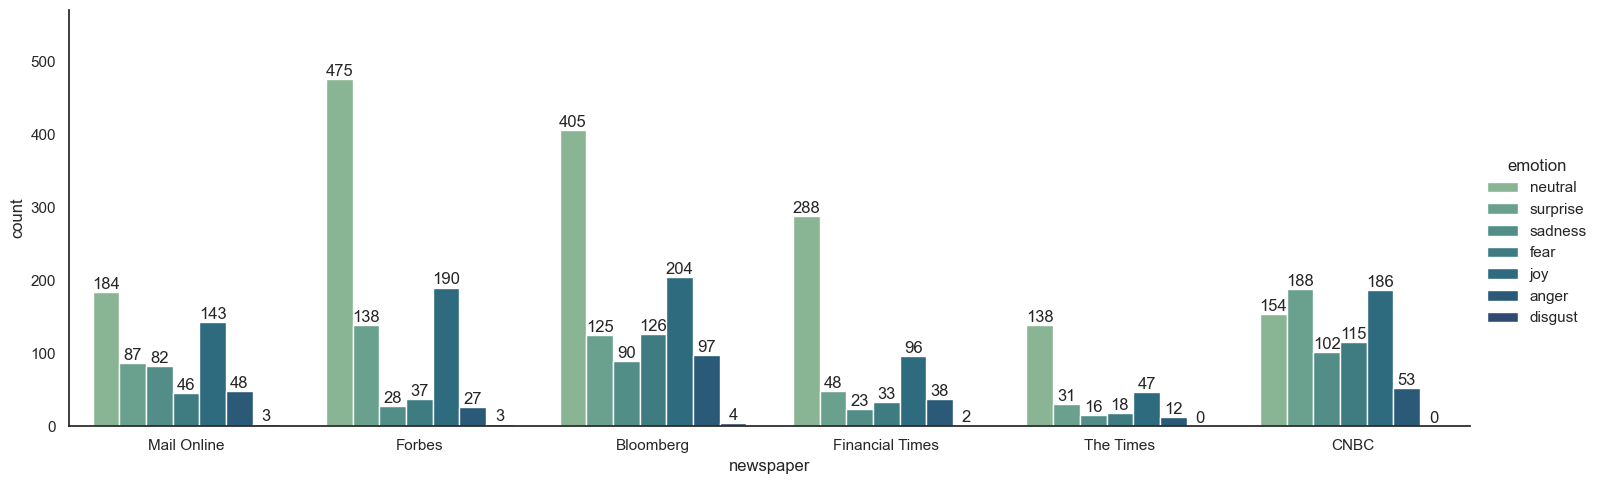

In [69]:

p = sns.catplot(x='newspaper',hue='emotion',data=df_senti,kind='count',aspect=3, palette='crest')

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

Graph showing the number of articles with a given emotion sentiment for each label neutral, positive, negative

In [70]:
df_senti.groupby(['emotion','label'])['emotion'].count()

emotion   label   
anger     Negative     76
          Neutral     107
          Positive     92
disgust   Negative      6
          Neutral       1
          Positive      5
fear      Negative     93
          Neutral     120
          Positive    162
joy       Negative    166
          Neutral     201
          Positive    499
neutral   Negative    225
          Neutral     678
          Positive    741
sadness   Negative    156
          Neutral      76
          Positive    109
surprise  Negative    130
          Neutral     136
          Positive    351
Name: emotion, dtype: int64

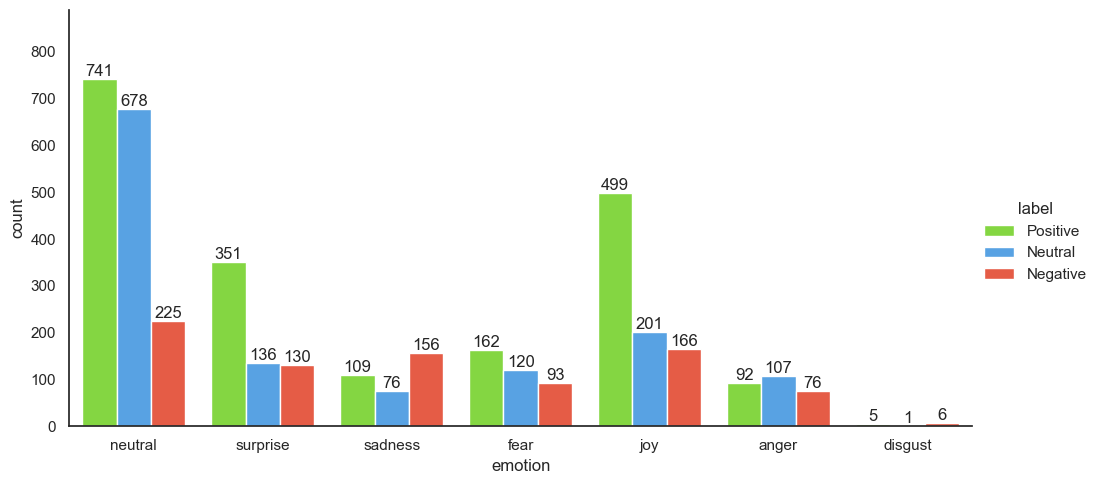

In [71]:

palette = ["#81EF29","#41A4FA","#FF492C"]
p = sns.catplot(x='emotion',hue='label',data=df_senti,kind='count',aspect=2, palette=palette)

for a_x in p.axes.ravel():
    
    # add numbers
    for num in a_x.containers:
        a_x.bar_label(num, label_type='edge')
    a_x.margins(y=0.2)

In [72]:
df_senti.sort_values(by='polarity',ascending=True).head(5)

,abstract,emotion,polarity,label,newspaper
1496,holding ltd sea ltd billion gaming industry en...,sadness,-1.0,Negative,Bloomberg
674,report worst quarter ever reality lab division...,disgust,-1.0,Negative,Forbes
1706,campaign master struggle party find standoff o...,anger,-1.0,Negative,Bloomberg
571,shanghai sept hong stock headed worst day almo...,sadness,-1.0,Negative,Mail Online
2423,tool avoid worst outcome wed use,disgust,-1.0,Negative,Bloomberg


In [73]:
df_senti.sort_values(by='polarity',ascending=False).head(5)


,abstract,emotion,polarity,label,newspaper
666,one best way familiarize metaverse experience ...,neutral,1.0,Positive,Forbes
3277,best known blackjack table slot,neutral,1.0,Positive,The Times
3094,heel turn tide answer conquer metaverse yes ad...,neutral,1.0,Positive,The Times
2668,best member panel business metaverse find stra...,neutral,1.0,Positive,Financial Times
3510,bank added meta best investment idea list call...,surprise,1.0,Positive,CNBC


Extracting most common words associated with each emotion

In [82]:
def without_topic_words(txt):
    topic_words=  ['metaverse','meta']
    return list(filter(lambda w: w not in topic_words, txt.split()))


def get_keywords(txt, num=20):
    tokens= without_topic_words(txt)
    most_cmmn= Counter(tokens).most_common(num)
    return dict(most_cmmn)

In [83]:
emotions = df_senti['emotion'].unique().tolist()
emotions

['neutral', 'surprise', 'sadness', 'fear', 'joy', 'anger', 'disgust']

In [84]:
surprise_words=df_senti[df_senti['emotion']=='surprise']['abstract'].to_list()
fear_words = df_senti[df_senti['emotion']=='fear']['abstract'].to_list()
anger_words= df_senti[df_senti['emotion']=='anger']['abstract'].to_list()
sadness_words= df_senti[df_senti['emotion']=='sadness']['abstract'].to_list()
#neutral_words=df_senti[df_senti['emotion']=='neutral']['abstract'].to_list()
joy_words=df_senti[df_senti['emotion']=='joy']['abstract'].to_list()
disgust_words=df_senti[df_senti['emotion']=='disgust']['abstract'].to_list()

In [85]:
surprise_text= ' '.join(surprise_words)
fear_text= ' '.join(fear_words)
anger_text= ' '.join(anger_words)
sadness_text= ' '.join(sadness_words)
#neutral_text= ' '.join(neutral_words)
joy_text= ' '.join(joy_words)
disgust_text= ' '.join(disgust_words)



In [87]:
keywords_surprise=get_keywords(surprise_text)
keywords_fear=get_keywords(fear_text)
keywords_anger=get_keywords(anger_text)
keywords_sadness=get_keywords(sadness_text)
keywords_joy=get_keywords(joy_text)
keywords_disgust=get_keywords(disgust_text)



In [96]:
def plot_common_words(dict):
    df=pd.DataFrame(dict.items(), columns=['token','count'])
    plt.figure(figsize=(10,5))
    sns.barplot(x='count',y='token',data=df,palette=['grey'])
    plt.show()

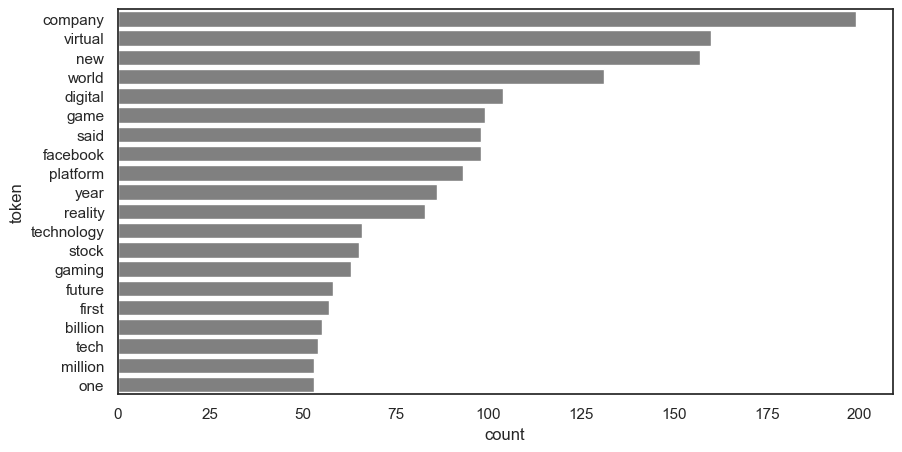

In [97]:
plot_common_words(keywords_joy)

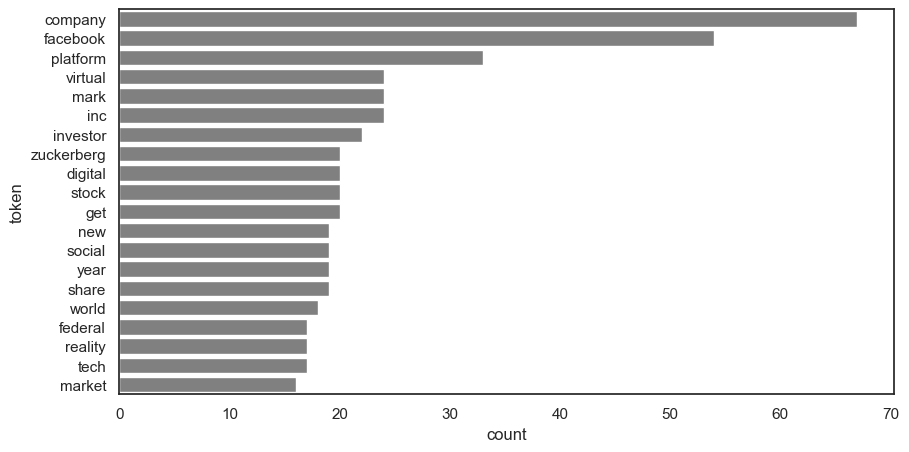

In [99]:
plot_common_words(keywords_anger)